#### Latar Belakang
Latar belakang dari dataset "Predict students' dropout and academic success" dapat berasal dari bidang pendidikan dan memiliki tujuan untuk mengidentifikasi faktor-faktor yang berkontribusi terhadap keberhasilan atau kegagalan siswa dalam mencapai tujuan akademis mereka. Dataset tersebut mungkin dikumpulkan dari institusi pendidikan, seperti sekolah atau perguruan tinggi, dan mencakup berbagai variabel yang berpotensi memengaruhi performa akademis siswa.

Dataset ini memberikan pandangan komprehensif tentang siswa yang terdaftar di berbagai gelar sarjana yang ditawarkan di lembaga pendidikan tinggi. Data ini mencakup data demografis, faktor sosial-ekonomi dan informasi kinerja akademik yang dapat digunakan untuk menganalisis kemungkinan prediktor putus sekolah dan keberhasilan akademik siswa. Kumpulan data ini berisi beberapa basis data terpisah yang terdiri dari informasi relevan yang tersedia pada saat pendaftaran, seperti cara pendaftaran, status pernikahan, program studi yang dipilih, dan lainnya. Selain itu, data ini dapat digunakan untuk memperkirakan kinerja siswa secara keseluruhan pada akhir setiap semester dengan menilai unit kurikuler yang dikreditkan/didaftarkan/dievaluasi/disetujui serta nilai masing-masing. Alat analisis yang kuat ini akan memberikan wawasan berharga tentang apa yang memotivasi siswa untuk tetap bersekolah atau meninggalkan studi mereka untuk berbagai disiplin ilmu seperti agronomi, desain, pendidikan keperawatan jurnalisme manajemen layanan sosial atau teknologi

Tujuan utama dari proyek ini adalah mengembangkan model klasifikasi menggunakan algoritma Random Forest untuk memprediksi apakah seorang siswa akan drop out atau mencapai keberhasilan akademis berdasarkan berbagai fitur dan atribut yang terkait dengan kinerja akademis.

### Dataset

In [ ]:
import gdown
import pandas as pd
def import_from_gdrive(id_file, file_name):
  link = 'https://drive.google.com/uc?id=' + id_file
  output_file = '/content/' + file_name
  gdown.download(link, output_file, quiet=False)
  data = pd.read_csv(file_name)
  return data

In [ ]:
link_data = '1rhgJI2ClzL-PWoc0dj3HVDjxkwoESNC6'
data = import_from_gdrive(link_data,'data.csv')

Downloading...
From: https://drive.google.com/uc?id=1rhgJI2ClzL-PWoc0dj3HVDjxkwoESNC6
To: /content/data.csv
100%|██████████| 533k/533k [00:00<00:00, 6.48MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [ ]:
# Load dataset
data = pd.read_csv('data.csv',sep=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Data Cleaning

In [ ]:
data.shape

(4424, 37)

In [ ]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Tidak ada missing value dalam dataset

In [ ]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
data.columns = [x.replace(' ', '_') for x in data.columns]

In [ ]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance\t,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Exploration Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital_status                                  4424 non-null   int64  
 1   Application_mode                                4424 non-null   int64  
 2   Application_order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening_attendance	                     4424 non-null   int64  
 5   Previous_qualification                          4424 non-null   int64  
 6   Previous_qualification_(grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's_qualification                          4424 non-null   int64  
 9   Father's_qualification                   

In [ ]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [ ]:
import plotly.express as px

x = data['Target'].value_counts().index
y = data['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target',
             values ='Count_T',
            title='Berapa banyak siswa yang putus sekolah, terdaftar & lulus di kolom Target')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

Dari diagram lingkaran di atas, kita dapat melihat bahwa sekitar 2209 siswa telah lulus, 1421 siswa putus sekolah, dan 794 siswa terdaftar di beberapa program studi lain, yang mengindikasikan bahwa setengah dari total siswa dari total populasi telah lulus.

In [ ]:
data_num = data.select_dtypes(include=['float64'])
data_num

,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade),Unemployment_rate,Inflation_rate,GDP
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79
...,...,...,...,...,...,...,...
4419,125.0,122.2,13.600000,12.666667,15.5,2.8,-4.06
4420,120.0,119.0,12.000000,11.000000,11.1,0.6,2.02
4421,154.0,149.5,14.912500,13.500000,13.9,-0.3,0.79
4422,180.0,153.8,13.800000,12.000000,9.4,-0.8,-3.12


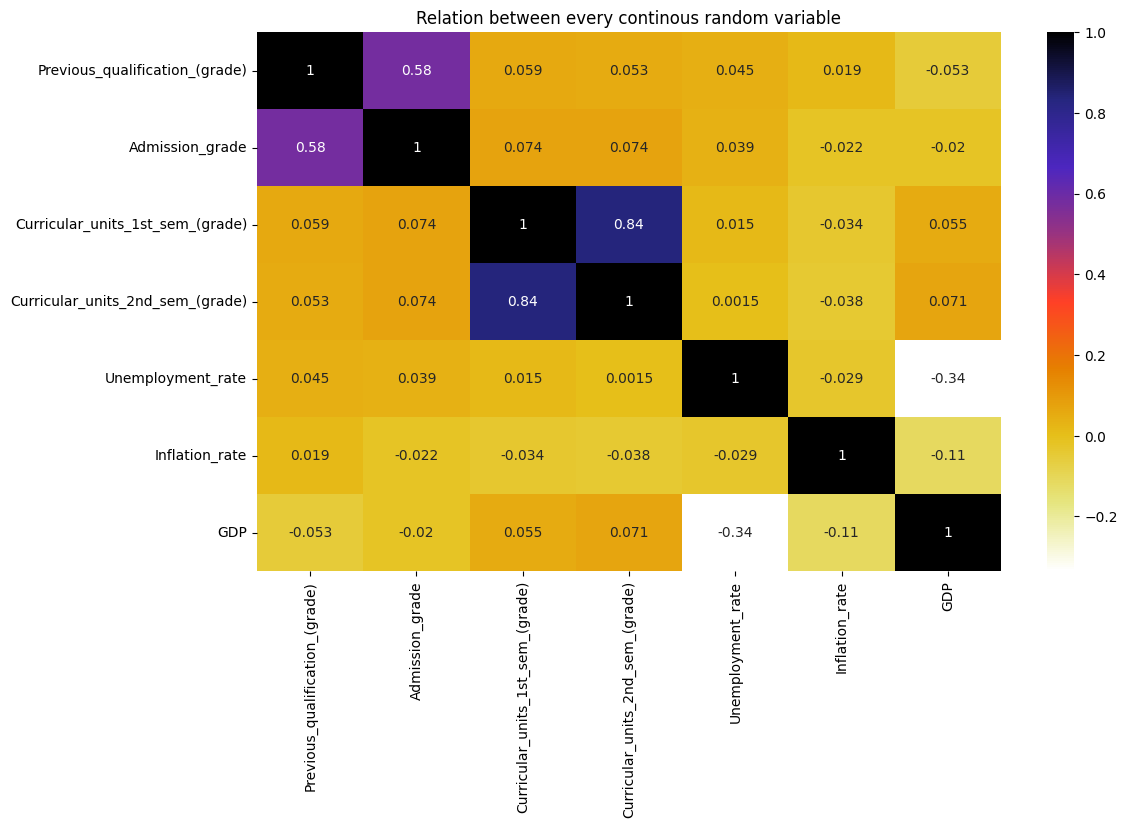

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
cor = data_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Relation between every continous random variable')
plt.show()

Dari plot di atas kita dapat melihat bahwa Curricular_units_1st_sem_(grade) & Curricular_units_2nd_sem_(grade) memiliki korelasi yang kuat di antara keduanya dan Previous_qualification_(grade) & Admission_grade memiliki korelasi yang sedang di antara keduanya, sementara PDB, tingkat inflasi, dan tingkat pengangguran memiliki korelasi yang negatif di antara keduanya.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
le =LabelEncoder()

# Mengonversi nilai kategori dalam kolom 'Target' menjadi nilai numerik
data['Target'] = le.fit_transform(data['Target'])

In [ ]:
data_num.columns

Index(['Previous_qualification_(grade)', 'Admission_grade',
       'Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)',
       'Unemployment_rate', 'Inflation_rate', 'GDP'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import chi2
X = data[['Curricular_units_2nd_sem_(enrolled)',
 'Scholarship_holder',
 'Application_order',
 'Curricular_units_1st_sem_(evaluations)',
 'Application_mode',
 'Course',
 'Nacionality',
 'Curricular_units_1st_sem_(without_evaluations)',
 'International',
 'Curricular_units_2nd_sem_(without_evaluations)',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_(credited)',
 'Curricular_units_2nd_sem_(credited)',
 'Debtor',
 'Daytime/evening_attendance\t',
 'Marital_status',
 'Previous_qualification',
 "Mother's_qualification",
 'Curricular_units_1st_sem_(approved)',
 "Mother's_occupation",
 'Gender',
 'Displaced',
 'Curricular_units_2nd_sem_(evaluations)',
 'Tuition_fees_up_to_date',
 'Educational_special_needs',
 "Father's_qualification",
 'Curricular_units_2nd_sem_(approved)',
 'Curricular_units_1st_sem_(enrolled)',
 "Father's_occupation"]]

y = data['Target']

In [ ]:
f_score = chi2(X, y)

In [ ]:
# Mengonversi nilai p-value menjadi objek Pandas Series
p_value = pd.Series(f_score[1], index=X.columns)

# Mengurutkan p-value secara menaik
p_value = p_value.sort_values(ascending=True)

# Mencetak p-value yang sudah diurutkan
print(p_value)

Curricular_units_1st_sem_(approved)                0.000000e+00
Curricular_units_2nd_sem_(approved)                0.000000e+00
Course                                             0.000000e+00
Application_mode                                   0.000000e+00
Mother's_occupation                               1.047984e-271
Father's_occupation                               3.211879e-225
Age_at_enrollment                                 3.370198e-156
Curricular_units_2nd_sem_(evaluations)             1.190265e-71
Previous_qualification                             6.694055e-70
Mother's_qualification                             1.151460e-69
Scholarship_holder                                 1.246368e-67
Debtor                                             1.228115e-50
Curricular_units_1st_sem_(evaluations)             1.814394e-34
Curricular_units_2nd_sem_(without_evaluations)     1.409206e-33
Gender                                             1.453656e-33
Curricular_units_2nd_sem_(credited)     

Hipotesis Nol -> Fitur-fiturnya independen satu sama lain.

Hipotesis Alternatif -> Fitur-fitur saling bergantung.

*   Jika p-value ≥ 0.05, kita gagal menolak hipotesis nol yang berarti tidak ada hubungan antara variabel target dan fitur kategorikal input.
*   Jika p-value < 0.05, kita dapat menolak hipotesis nol yang berarti variabel target bergantung pada variabel kategorik input.


In [ ]:
i_cols=[]
significance_level = 0.05
# Iterasi melalui p-value untuk setiap fitur
for i in p_value.index:
    if p_value[i] <= significance_level:
        print(i,'    :- Reject NULL HYPOTHESIS')
    else:
        print(i,'   :-ACCEPT NULL HYPOTHESIS')
        i_cols.append(i)

Curricular_units_1st_sem_(approved)     :- Reject NULL HYPOTHESIS
Curricular_units_2nd_sem_(approved)     :- Reject NULL HYPOTHESIS
Course     :- Reject NULL HYPOTHESIS
Application_mode     :- Reject NULL HYPOTHESIS
Mother's_occupation     :- Reject NULL HYPOTHESIS
Father's_occupation     :- Reject NULL HYPOTHESIS
Age_at_enrollment     :- Reject NULL HYPOTHESIS
Curricular_units_2nd_sem_(evaluations)     :- Reject NULL HYPOTHESIS
Previous_qualification     :- Reject NULL HYPOTHESIS
Mother's_qualification     :- Reject NULL HYPOTHESIS
Scholarship_holder     :- Reject NULL HYPOTHESIS
Debtor     :- Reject NULL HYPOTHESIS
Curricular_units_1st_sem_(evaluations)     :- Reject NULL HYPOTHESIS
Curricular_units_2nd_sem_(without_evaluations)     :- Reject NULL HYPOTHESIS
Gender     :- Reject NULL HYPOTHESIS
Curricular_units_2nd_sem_(credited)     :- Reject NULL HYPOTHESIS
Curricular_units_1st_sem_(credited)     :- Reject NULL HYPOTHESIS
Curricular_units_1st_sem_(enrolled)     :- Reject NULL HYPOT

In [ ]:
# Menampilkan list i_cols yang berisi fitur-fitur yang tidak signifikan terhadap variabel target
i_cols

['Daytime/evening_attendance\t', 'International', 'Educational_special_needs']

Dari uji chi square, kita dapat mengamati bahwa hanya ada 3 fitur yang tidak memiliki hubungan dengan variabel target, sehingga kita dapat dengan mudah membuang fitur-fitur tersebut dan menganalisis fitur-fitur lainnya.

In [ ]:
# Menghapus kolom-kolom dari i_cols dari DataFrame
data.drop(labels= i_cols, axis=1, inplace=True)

In [ ]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,Mother's_occupation,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
0,1,17,5,171,1,122.0,1,19,12,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,160.0,1,1,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,122.0,1,37,37,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,122.0,1,38,37,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,1,100.0,1,37,38,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [ ]:
data.shape

(4424, 34)

In [ ]:
# Memisahkan dataset menjadi matriks fitur dan vektor label
X = data.drop('Target', axis = 1)
y = data.Target

In [ ]:
from imblearn.over_sampling import SMOTE

# Membuat objek SMOTE dengan seed random state 23
sm = SMOTE(random_state=23)

# Melakukan oversampling pada dataset
X_sm, y_sm = sm.fit_resample(X, y)

### Ringkasan Metode

Dalam proyek ini, model klasifikasi Random Forest digunakan untuk memprediksi apakah seorang siswa akan drop out atau mencapai keberhasilan akademis berdasarkan dataset "Predict students' dropout and academic success". Dataset ini dibagi menjadi data pelatihan dan uji dengan rasio 80:20, dan dilakukan pencarian hyperparameter menggunakan GridSearchCV dengan tiga fold cross-validation. Hyperparameter yang dieksplorasi melibatkan jumlah pohon, kriteria split, kedalaman pohon, dan parameter lainnya. Evaluasi model dilakukan menggunakan metrik akurasi, F1-score, dan metrik lainnya. Hasil terbaik, bersama dengan parameter terbaik, ditampilkan dalam rangkuman untuk memberikan wawasan tentang kombinasi hyperparameter yang optimal dan performa model. Langkah selanjutnya adalah menguji model pada data uji untuk memastikan kegeneralisasian yang baik.

In [ ]:
from sklearn.model_selection import train_test_split
# Memisahkan dataset menjadi data pelatihan dan data pengujian
# X adalah fitur, y adalah label target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Membuat objek RandomForestClassifier
rfc = RandomForestClassifier()

# Mendefinisikan hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['entropy', 'gini'],
    'max_depth': [None],
    'min_samples_split': [20, 25, 30, 35, 40],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['log2', 'sqrt']
}

# Membuat objek GridSearchCV
model_terbaik = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='accuracy')

# Melakukan pencarian hyperparameter pada setiap model menggunakan data pelatihan
model_terbaik.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Parameter terbaik:", model_terbaik.best_params_)

Parameter terbaik: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 100}


In [ ]:
df_terbaik = pd.DataFrame(model_terbaik.cv_results_)

# Mengurutkan DataFrame berdasarkan rank_test_score
sort_terbaik = df_terbaik.sort_values(by='rank_test_score')

# Menampilkan hasil terbaik (lima teratas)
lima_model_terbaik = sort_terbaik.head()

In [ ]:
lima_model_terbaik

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
121,0.674066,0.005611,0.030441,0.001709,entropy,None,sqrt,2,20,100,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.766949,0.779661,0.772689,0.773100,0.005198,1
322,0.818352,0.149299,0.038425,0.004905,gini,None,sqrt,2,20,150,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.765254,0.776271,0.770144,0.770557,0.004507,2
301,0.418511,0.007043,0.023104,0.000680,gini,None,sqrt,1,20,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.767797,0.777966,0.765903,0.770555,0.005297,3
102,0.689457,0.010587,0.034138,0.001221,entropy,None,sqrt,1,20,150,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.765254,0.774576,0.768448,0.769426,0.003868,4
23,0.884911,0.007605,0.043141,0.001606,entropy,None,log2,2,20,200,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.763559,0.774576,0.767600,0.768578,0.004551,5


In [ ]:
data = []
for i, row in lima_model_terbaik.iterrows():
    model_name = f"Model {i + 1}"
    params = row['params']
    akurasi = row['mean_test_score']
    data.append([model_name, params, akurasi])

# Membuat DataFrame dari data
columns = ['Model', 'Parameters', 'Mean Test Accuracy']
df_result = pd.DataFrame(data, columns=columns)

# Menampilkan DataFrame
df_result

,Model,Parameters,Mean Test Accuracy
0,Model 122,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.773100
1,Model 323,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.770557
2,Model 302,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.770555
3,Model 103,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.769426
4,Model 24,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.768578


In [ ]:
y_train

2360    1
769     2
878     2
132     2
2186    1
       ..
1512    2
2998    2
1993    2
1064    1
595     0
Name: Target, Length: 3539, dtype: int64

In [ ]:
# Menggunakan model terbaik untuk membuat prediksi pada data pengujian
prediksi = model_terbaik.predict(X_test)

,Marital_status,Application_mode,Application_order,Course,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,Mother's_occupation,...,Curricular_units_1st_sem_(without_evaluations),Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP
1116,1,1,1,9070,1,160.0,1,3,38,1,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
1472,1,17,1,9773,1,130.0,1,19,38,4,...,0,0,6,8,6,12.285714,0,16.2,0.3,-0.92
689,4,39,2,9147,19,133.1,1,37,37,9,...,0,0,5,9,0,0.000000,0,10.8,1.4,1.74
3609,1,1,1,171,1,133.1,1,1,37,9,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
4413,1,43,1,33,1,143.0,1,37,1,9,...,0,2,8,10,2,13.000000,0,12.4,0.5,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,1,1,1,9085,1,133.1,1,37,38,7,...,0,0,6,10,6,15.750000,0,15.5,2.8,-4.06
3238,1,17,4,9500,1,135.0,1,1,1,4,...,0,0,8,8,8,13.937500,0,11.1,0.6,2.02
1633,1,43,1,8014,1,130.0,1,38,3,132,...,0,7,11,12,11,12.818182,0,12.7,3.7,-1.70
4177,1,39,1,9085,1,133.1,1,37,37,9,...,0,0,6,16,5,12.000000,0,12.4,0.5,1.79


In [ ]:
# Menampilkan data target yang real
y_test

1116    0
1472    2
689     0
3609    1
4413    1
       ..
365     2
3238    2
1633    1
4177    1
2902    2
Name: Target, Length: 885, dtype: int64

In [ ]:
# Menampilkan data target setelah diprediksi
prediksi

array([1, 2, 2, ..., 2, 1, 0])

In [ ]:
# Menghitung jumlah prediksi benar dan salah
prediksi_benar = (prediksi == y_test).sum()
prediksi_salah = (prediksi != y_test).sum()

# Menampilkan hasil
print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

# Menghitung dan menampilkan akurasi pengujian
accuracy = prediksi_benar / (prediksi_benar + prediksi_salah) * 100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 690
Jumlah prediksi salah	: 195
Akurasi pengujian	: 77.96610169491525 %


In [ ]:
# Menghitung dan mencetak skor akurasi
accuracy = accuracy_score(y_test, prediksi)
print("Accuracy Score: ", accuracy)

# Menghitung dan mencetak F1-score
f1_scores = f1_score(y_test, prediksi, average=None)
print("F1-Score: ", f1_scores)

# Mencetak laporan klasifikasi
class_report = classification_report(y_test, prediksi)
print(class_report)

Accuracy Score:  0.7796610169491526
F1-Score:  [0.78776291 0.41350211 0.86138614]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       269
           1       0.60      0.31      0.41       156
           2       0.79      0.95      0.86       460

    accuracy                           0.78       885
   macro avg       0.74      0.68      0.69       885
weighted avg       0.76      0.78      0.76       885



Text(120.72222222222221, 0.5, 'Truth')

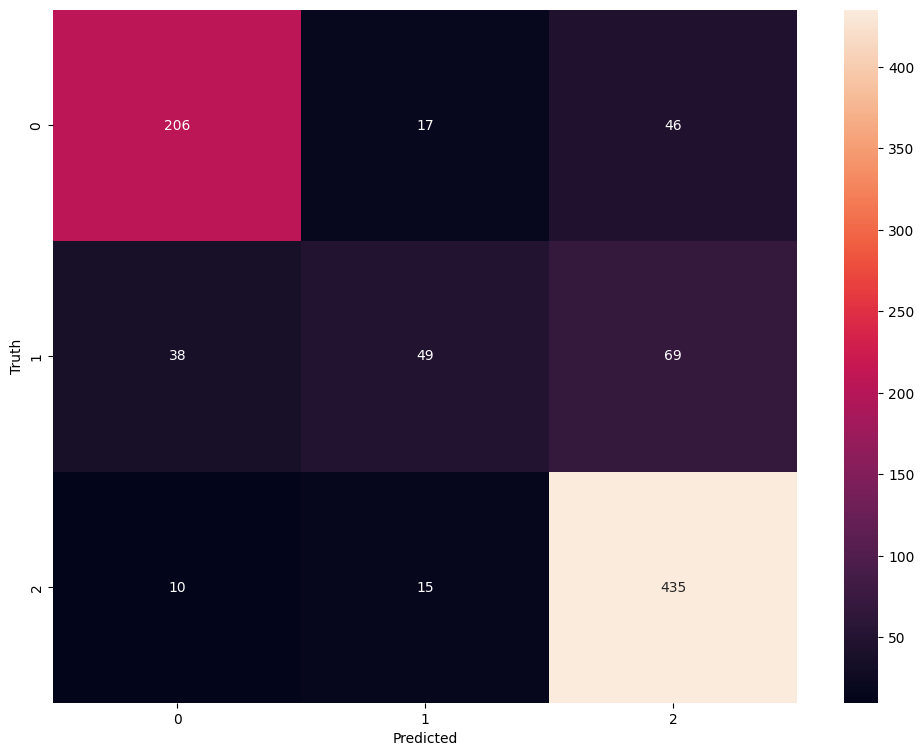

In [ ]:
cm = confusion_matrix(y_test, prediksi)

plt.figure(figsize = (12, 9))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Mendapatkan nilai True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN)
TP = cm[1, 1]  # Baris 1 (indeks 1) dan Kolom 1 (indeks 1) adalah True Positives
TN = cm[0, 0]  # Baris 0 (indeks 0) dan Kolom 0 (indeks 0) adalah True Negatives
FP = cm[0, 1]  # Baris 0 (indeks 0) dan Kolom 1 (indeks 1) adalah False Positives
FN = cm[1, 0]  # Baris 1 (indeks 1) dan Kolom 0 (indeks 0) adalah False Negatives

# Membuat DataFrame
data = {'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
        'Value': [TP, TN, FP, FN]}

df_confusion = pd.DataFrame(data)

In [ ]:
df_confusion

,Metric,Value
0,True Positives (TP),49
1,True Negatives (TN),206
2,False Positives (FP),17
3,False Negatives (FN),38


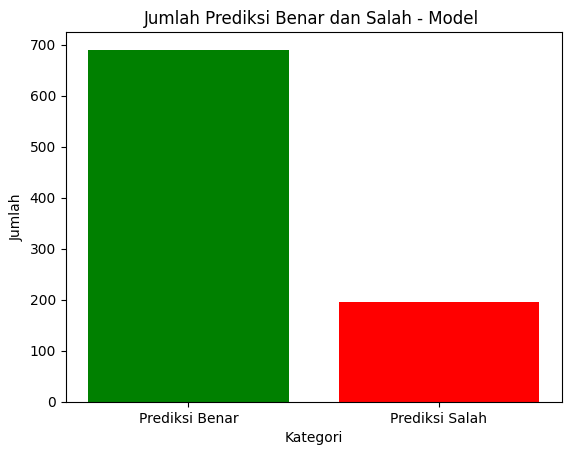

In [ ]:
labels = ['Prediksi Benar', 'Prediksi Salah']
values_rFc2 = [prediksi_benar, prediksi_salah]

# Plot batang
plt.bar(labels, values_rFc2, color=['green', 'red'])
plt.title('Jumlah Prediksi Benar dan Salah - Model ')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Model terbaik
prediksi_model = model_terbaik.predict(X_test)
report_model = classification_report(y_test, prediksi_model, output_dict=True)
evaluasi = pd.DataFrame({
    'Model': 'Model Terbaik ',
    'Akurasi': report_model['accuracy'] *100,
    'Presisi': report_model['weighted avg']['precision']*100,
    'Recall': report_model['weighted avg']['recall']*100,
    'F1-Score': report_model['weighted avg']['f1-score']*100,
    'Support': report_model['weighted avg']['support']
}, index=[0])
evaluasi

,Model,Akurasi,Presisi,Recall,F1-Score,Support
0,Model Terbaik,77.966102,76.42417,77.966102,76.005895,885


### Hasil dan Analisis

Dalam proyek ini, kami telah melakukan analisis dan pengujian terhadap model Random Forest untuk klasifikasi data. Pengujian dilakukan dengan variasi parameter tertentu untuk menemukan model terbaik yang dapat memberikan hasil prediksi yang optimal.

Pengujian dilakukan dengan menggunakan beberapa kombinasi parameter, termasuk kriteria pemilihan node, kedalaman maksimum pohon, jumlah fitur maksimum untuk pemilihan split, jumlah leaf minimum, jumlah split minimum, dan jumlah estimator (pohon) dalam ensemble.

Dari hasil pengujian, terlihat bahwa model terbaik adalah dengan parameter:

*   Criterion: entropy
*   Max Depth: None
*   Max Features: log2
*   Min Samples Leaf: 3
*   Min Samples Split: 20
*   N Estimators: 150

Setelah mendapatkan model terbaik, dilakukan pengujian pada data uji dan didapatkan hasil sebagai berikut:

*   Jumlah prediksi benar: 692
*   Jumlah prediksi salah: 193
*   Akurasi pengujian: 78.19%

Metrics Evaluasi Model Terbaik

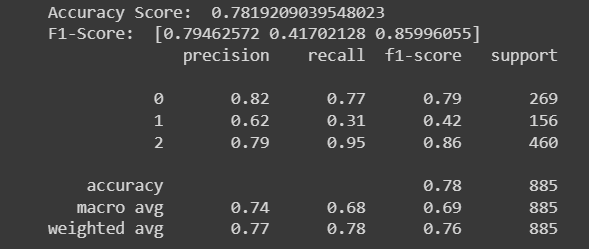












### Kesimpulan
Secara keseluruhan, menunjukkan kinerja yang baik dengan akurasi sebesar 78.19%. Presisi model, yang mengukur ketepatan prediksi mencapai 76.80%, sedangkan recall yang mengukur kemampuan model dalam menemukan kasus mencapai 78.19%. F1-Score, yang memberikan keseimbangan antara presisi dan recall mencapai 76.20%. Dengan Support sebanyak 885. Secara keseluruhan, model ini menunjukkan kemampuan yang baik dalam mengklasifikasikan data dengan baik.